# Analysis of the selection

## The component selection: <a class="anchor" id="component_list"></a>

**Namely, after using BoNesis for** <span style="color:green;font-weight:bold">optimization</span>:
* <span style="color:green">maximization of the number of nodes in the model</span>  (nodes with which it is possible to explain the dynamics)
* <span style="color:green">maximization of the number of strong constants</span>  (nodes having a constant value throughout the dynamics)

**selection of the nodes included in the optimized model, by removing its strong constants.**

In [27]:
components = ("ATF3", "ATF7", "CEBPA", "CREM", "E2F1", "EBF1", "ESR1", "FLI1", "FOS", "FOXO3", "FOXP2", "GATA1", "GFI1B", "HBP1", "HNF4A", "IKZF1", "IRF1", "IRF2", "JUN", "JUNB", "KLF1", "KLF6", "MEF2C", "MYB", "MYC", "NFATC1", "NRF1", "RELA", "RUNX1", "SP1", "SPI1", "STAT1", "STAT3", "STAT6", "TBP", "TBX21", "TCF12", "TRP53", "ZEB2")
print(f"Number of selected components: {len(components)}")

Number of selected components: 39


------
## Summary

* [**Comparison with 3 state-of-the-art models**](#Comparison-with-state-of-the-art-models)
* [**The subgraph made of the 39 selected components**](#Subgraph-made-of-the-39-selected-components)
* [**Genes among these 39 selected genes having expression data in the single-cell dataset from Nestorowa**](#Genes-among-these-39-selected-genes-having-expression-data-in-the-single-cell-dataset-from-Nestorowa)
     + [Their binarized expression values in the six observations (S0 to S5)](#Their-binarized-expression-values-in-the-six-observations-(S0-to-S5):) 
     + [The evolution of their raw expression values, along the differentiation trajectory](#The-evolution-of-their-raw-expression-values,-along-the-differentiation-trajectory:)
------

## Comparison with state-of-the-art models
* **Hamey et al, 2017,** *Reconstructing blood stem cell regulatory network models from single-cell molecular profiles*.
* **Collombet et al, 2017,** *Logical modeling of lymphoid and myeloid cell specification and transdifferentiation*.
* **Moignard et al, 2015,** *Decoding the regulatory network of early blood development from single-cell gene expression measurements*.

In [2]:
hamey = {"BPTF", "PRDM16", "GATA3", "ETV6", "NKX2.3", "HOXA5", "ETS1", "NOTCH", "HOXB4", "GFI1B", "TAL1", "HHEX", "PBX1", "GATA2", "NFE2", "MEIS1", "CBFA2T3H", "ETS2", "GATA1", "LMO2", "LDB1", "IKZF1", "SMARCC1", "FLI1", "LYL1", "HOXA9", "MITF", "RUNX1", "TCF7", "ERG", "MYB"}
collombet = {"CSF1", "CSF1R", "CEBPA", "CEBPB", "MAC1", "RUNX1", "SPI1", "MEF2C", "IKZF1", "GFI1", "EGR1", "E2A", "ID2", "ETS1", "FOXO1", "EBF1", "PAX5", "CD19", "IL7", "IL7R"}
moignard = {"ETV2", "FLI1", "SCL", "GATA1", "NOTCH1", "SOX7", "HOXB4", "LYL1", "IKAROS", "ERG", "PU.1", "MYB", "NFE2", "ETS1", "ETO2", "HHEX", "LMO2", "SOX17", "GFI1", "GFI1B"}

print(f"Hamey: {len(hamey)}")
print(f"Collombet: {len(collombet)}")
print(f"Moignard: {len(moignard)}")

Hamey: 31
Collombet: 20
Moignard: 20


**Gene name standardization:**

*nb: The genes in `components` (i.e. the selection of components after the optimization process through BoNesis) are already standardized given "data/Mus_musculus.gene_info.202103.tsv", as they result from [component_selection.ipynb](./component_selection.ipynb).*

In [3]:
import gene_name_standardization as gns

In [4]:
import os
synonyms = gns.synonyms_from_NCBI("data/Mus_musculus.gene_info.202103.tsv")

In [5]:
hamey_ref = gns.set_standardization(hamey, synonyms)
print(f"Hamey's genes standardization:\nbefore:\t{hamey.difference(hamey_ref)}\nafter:\t{hamey_ref.difference(hamey)}")

Hamey's genes standardization:
before:	{'CBFA2T3H', 'NKX2.3'}
after:	{'CBFA2T3', 'NKX2-3'}


In [6]:
collombet_ref = gns.set_standardization(collombet, synonyms)
print(f"Collombet's genes standardization:\nbefore:\t{collombet.difference(collombet_ref)}\nafter:\t{collombet_ref.difference(collombet)}")

Collombet's genes standardization:
before:	{'MAC1', 'E2A'}
after:	{'TCF3', 'ITGAM'}


In [7]:
moignard_ref = gns.set_standardization(moignard, synonyms)
print(f"Moignard' genes standardization:\nbefore:\t{moignard.difference(moignard_ref)}\nafter:\t{moignard_ref.difference(moignard)}")

Moignard' genes standardization:
before:	{'PU.1', 'IKAROS', 'SCL', 'ETO2'}
after:	{'IKZF1', 'CBFA2T3', 'SPI1', 'SCX'}


**Comparison of the models and the component selection with BoNesis:**

In [8]:
print(f"Hamey - Moignard intersection: {len(hamey_ref.intersection(moignard_ref))} genes\n{sorted(hamey_ref.intersection(moignard_ref))}\n")
print(f"Hamey - Collombet intersection: {len(hamey_ref.intersection(collombet_ref))} genes\n{sorted(hamey_ref.intersection(collombet_ref))}\n")
print(f"Collombet - Moignard intersection: {len(collombet_ref.intersection(moignard_ref))} genes\n{sorted(collombet_ref.intersection(moignard_ref))}\n")
print(f"Hamey - Collombet - Moignard: {len(hamey_ref.intersection(moignard_ref).intersection(collombet_ref))} genes\n{sorted(hamey_ref.intersection(moignard_ref).intersection(collombet_ref))}\n")

Hamey - Moignard intersection: 13 genes
['CBFA2T3', 'ERG', 'ETS1', 'FLI1', 'GATA1', 'GFI1B', 'HHEX', 'HOXB4', 'IKZF1', 'LMO2', 'LYL1', 'MYB', 'NFE2']

Hamey - Collombet intersection: 3 genes
['ETS1', 'IKZF1', 'RUNX1']

Collombet - Moignard intersection: 4 genes
['ETS1', 'GFI1', 'IKZF1', 'SPI1']

Hamey - Collombet - Moignard: 2 genes
['ETS1', 'IKZF1']



In [9]:
print(f"Comparison of component selection via BoNesis with:\n")
print(f" - Hamey ({len(hamey)} nds), nb of common genes: {len(set(components).intersection(hamey_ref))}\n{sorted(list(set(components).intersection(hamey_ref)))}\n")
print(f" - Moignard ({len(moignard)} nds), nb of common genes: {len(set(components).intersection(moignard_ref))}\n{sorted(list(set(components).intersection(moignard_ref)))}\n")
print(f" - Collombet ({len(collombet)} nds), nb of common genes: {len(set(components).intersection(collombet_ref))}\n{sorted(list(set(components).intersection(collombet_ref)))}\n")
print(f"Genes in common with the intersection of the three state-of-the-art models and the selection via BoNesis: {len(set(components).intersection(hamey_ref).intersection(moignard_ref).intersection(collombet_ref))}\n{list(set(components).intersection(hamey_ref).intersection(moignard_ref).intersection(collombet_ref))}")

Comparison of component selection via BoNesis with:

 - Hamey (31 nds), nb of common genes: 6
['FLI1', 'GATA1', 'GFI1B', 'IKZF1', 'MYB', 'RUNX1']

 - Moignard (20 nds), nb of common genes: 6
['FLI1', 'GATA1', 'GFI1B', 'IKZF1', 'MYB', 'SPI1']

 - Collombet (20 nds), nb of common genes: 6
['CEBPA', 'EBF1', 'IKZF1', 'MEF2C', 'RUNX1', 'SPI1']

Genes in common with the intersection of the three state-of-the-art models and the selection via BoNesis: 1
['IKZF1']


In [10]:
with_hamey = set(components).intersection(hamey_ref)
with_moignard = set(components).intersection(moignard_ref)
with_collombet = set(components).intersection(collombet_ref)

selected_genes = with_hamey.union(with_moignard).union(with_collombet)

print(f"Hamey, Moignard, Collombet models have {len(hamey_ref.union(moignard_ref).union(collombet_ref))} distinct genes.")
print(f"{len(selected_genes)} over the {len(components)} genes of our selection are in common with those being in state-of-the-art models: \n{sorted(list(selected_genes))}")

Hamey, Moignard, Collombet models have 53 distinct genes.
10 over the 39 genes of our selection are in common with those being in state-of-the-art models: 
['CEBPA', 'EBF1', 'FLI1', 'GATA1', 'GFI1B', 'IKZF1', 'MEF2C', 'MYB', 'RUNX1', 'SPI1']


## Subgraph made of the 39 selected components

In [11]:
import networkx as nx
import pandas as pd

In [12]:
df = pd.read_csv("data/dorothea_ABC_20210707_TF.sif", header=None, names=("in", "sign", "out"), sep="\t")
standardized_dorothea = nx.from_pandas_edgelist(df, "in", "out", ["sign"], nx.MultiDiGraph())
subgraph_from_selection = standardized_dorothea.subgraph(set(components))

In [13]:
print(f"{len(subgraph_from_selection.nodes())} nodes, {len(subgraph_from_selection.edges())} edges")

39 nodes, 137 edges


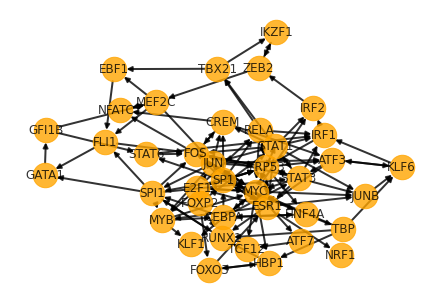

In [14]:
nx.draw_kamada_kawai(subgraph_from_selection, with_labels=True, node_size=600, 
                     node_color="orange", width=2, node_shape="o", alpha=0.8)

**Indegrees**

In [15]:
indegree = dict()
for node in sorted(list(subgraph_from_selection.nodes())):
    #print(f"{node}: {subgraph_from_selection.in_degree[node]}")
    if subgraph_from_selection.in_degree[node] not in indegree.keys():
        indegree[subgraph_from_selection.in_degree[node]] = 1
    else:
        indegree[subgraph_from_selection.in_degree[node]] += 1
indegree = {key:value for key, value in sorted(indegree.items())}

In [16]:
import matplotlib.pyplot as plt

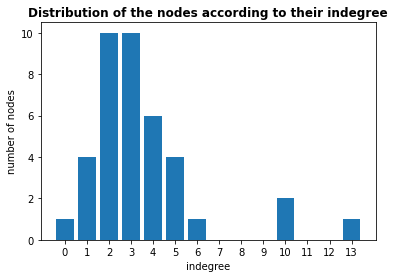

In [17]:
plt.xlabel('indegree')
plt.ylabel('number of nodes')
plt.title("Distribution of the nodes according to their indegree", weight='bold')
plt.bar(indegree.keys(), indegree.values())
plt.xticks(range(14))
plt.show()

## Genes among these 39 selected genes having expression data in the single-cell dataset from Nestorowa

In [18]:
df_nesto = pd.read_csv("data/nestorowa_singlecell_binarized_observations.csv", sep=",", index_col=[0])
observations_from_singlecell_nestorowa = df_nesto.to_dict(orient="index")

In [19]:
import gene_name_standardization as gns
# Standardization (according to the gene info from NCBI) of the genes in the single-cell dataset:
standardized_observations = gns.observations_standardization(observations_from_singlecell_nestorowa, 
                                                             "data/Mus_musculus.gene_info.202103.tsv")

### Their binarized expression values in the six observations (S0 to S5):

Despite measurements of expression in the raw Nestorowa single-cell dataset, a gene can have an undefined binarization whichever the observations along the differentiation trajectory (that means its expression values were not significant to determine either expressed or silenced).

In [20]:
expression_values = dict()
observed_genes = set()

for observation_id in sorted(list(standardized_observations.keys())):
    expression_values[observation_id] = dict()
    for gene in set(subgraph_from_selection.nodes()).intersection(standardized_observations[observation_id]):
        expression_values[observation_id][gene] = standardized_observations[observation_id][gene]
        observed_genes.add(gene)

df_39_expression_values = pd.DataFrame.from_dict(expression_values, orient="index")

In [21]:
df_39_expression_values

,MEF2C,IKZF1,NRF1,MYC,MYB,GATA1,KLF6,STAT3,STAT6,EBF1,...,JUNB,FOS,JUN,TCF12,ATF7,KLF1,STAT1,HNF4A,ESR1,IRF1
S0,1,NaN,0,0.0,NaN,0,NaN,1,0,NaN,...,1,0,1,0,0,0,0,NaN,0,1
S1,1,0.0,0,0.0,NaN,0,1.0,1,0,NaN,...,0,1,1,0,0,0,0,NaN,0,1
S2,1,0.0,0,0.0,0.0,0,1.0,1,0,NaN,...,1,1,1,0,0,0,0,NaN,0,1
S3,0,NaN,1,NaN,NaN,0,0.0,0,1,0.0,...,1,0,0,0,1,0,1,NaN,0,1
S4,1,NaN,0,NaN,NaN,0,0.0,1,1,0.0,...,1,0,0,1,1,0,0,NaN,0,1
S5,1,1.0,0,NaN,1.0,1,0.0,1,0,1.0,...,1,1,1,0,0,1,0,NaN,0,0


In [22]:
print(f"Among the {len(components)} selected genes, {len(df_39_expression_values.columns)} genes have raw expression values in the Nestorowa single-cell dataset.")

Among the 39 selected genes, 25 genes have raw expression values in the Nestorowa single-cell dataset.


### The evolution of their raw expression values, along the differentiation trajectory:

**For each of these 25 genes, a graph showing the evolution of its raw values along the trajectory is created and stored into a file in the directory [data/analysis/trajectory/raw_values_evolution/](./data/analysis/trajectory/raw_values_evolution/).**

memo for scatterplot :
* S1 S0 S3 S5 : 1323 points <-> 13.23 in
* S1 S0 S3 S4 : 903 points <-> 9.03
* S1 S0 S2 : 747 points <-> 7.47

In [23]:
df_raw = pd.read_csv("data/nestorowa_singlecell_raw_data.tsv", sep="\t", index_col=0) #, usecols=col_list)
df_raw = df_raw.transpose()
df_raw.columns = df_raw.columns.str.upper()

In [24]:
df_raw

,CLEC1B,KDM3A,CORO2B,8430408G22RIK,CLEC9A,PHF6,USP14,TMEM167B,KBTBD7,RAG2,...,ZFP438,RAB18,MZB1,B4GALT6,RNF125,IMPACT,TAF4B,ZFP521,HRH4,PSMA8
HSPC_025,0.0,4.891604,1.426148,0.0,0.0,2.599758,2.954035,6.357369,2.129140,1.426148,...,1.426148,9.660368,1.426148,1.426148,2.129140,8.177546,1.426148,1.426148,0.0,7.869409
HSPC_031,0.0,6.877725,0.000000,0.0,0.0,2.423483,1.804914,0.000000,0.000000,0.000000,...,0.000000,0.699126,0.000000,6.562672,0.000000,5.439604,0.699126,0.000000,0.0,0.000000
HSPC_037,0.0,0.000000,6.913384,0.0,0.0,2.051659,8.265465,0.000000,1.363402,0.000000,...,1.363402,8.885311,0.000000,1.363402,0.000000,8.068215,0.000000,2.051659,0.0,1.363402
LT-HSC_001,0.0,0.000000,8.178374,0.0,0.0,6.419817,3.453502,2.579528,2.579528,0.000000,...,2.579528,6.501342,4.947883,0.000000,0.000000,0.000000,2.579528,8.178374,0.0,2.579528
HSPC_001,0.0,0.000000,9.475577,0.0,0.0,7.733370,1.478900,0.000000,10.045601,0.532906,...,0.000000,1.693409,7.975432,8.561045,0.000000,6.539920,0.532906,0.000000,0.0,0.532906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Prog_834,0.0,5.264737,0.000000,0.0,0.0,1.752731,7.909088,1.276184,1.276184,0.000000,...,0.000000,8.370244,0.000000,7.042445,4.569953,4.856265,0.961982,7.208844,0.0,0.000000
Prog_840,0.0,4.925369,0.599847,0.0,0.0,7.049488,8.808974,5.824770,4.973511,0.599847,...,5.551040,8.700519,0.000000,7.077293,7.315383,5.418192,6.392396,7.099157,0.0,0.000000
Prog_846,0.0,1.277098,0.000000,0.0,0.0,7.745012,9.187885,6.525201,5.248354,0.000000,...,6.242874,8.532943,0.000000,6.798595,7.686398,2.188646,7.260360,0.000000,0.0,0.775476
Prog_852,0.0,1.878352,0.000000,0.0,0.0,4.092486,8.958552,0.000000,6.391854,1.225444,...,1.225444,6.773472,0.000000,7.819094,5.838133,1.878352,4.795221,0.000000,0.0,0.000000


In [25]:
def cells_per_trajectory_segment():
    cells_S0, cells_S1, cells_S2, cells_S3, cells_S4, cells_S5 = list(),list(),list(),list(),list(),list()

    dict_of_cells = {"cells_S0":cells_S0,"cells_S1":cells_S1,"cells_S2":cells_S2,"cells_S3":cells_S3,"cells_S4":cells_S4,"cells_S5":cells_S5}

    for k,v in dict_of_cells.items():
        with open(f"data/analysis/trajectory/cells_per_node/{k}", "r") as f:
            for n in f:
                v.append(n.strip())
                
    return dict_of_cells


def gene_raw_values_along_trajectory(gene_to_display, df_raw_values, segment_cells, format="pdf", show=False):
    """
    For a given gene, save a graph showing the evolution of its raw values along the trajectory.
    Cells which are gathered to constitute an observation are colored in red and the observation identifier is mentionned.
    
    Argument :
     * format: can be png, pdf, svg...
     * If show = True, display this graph in addition to saving it.
    """
    
    data = df_raw_values[gene_to_display]

    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=([12, 16]))
    #fig.suptitle("Normalized raw expression of FOS along the 3 pathways of differentiation")

    #### figure 1
    observation = ["S1", "S0", "S2"]
    observation_flag = 0

    filepath = "S1-S0-S2"
    col, segment = list(), list()
    cells_of_interest = segment_cells["cells_S1"] + segment_cells["cells_S0"] + segment_cells["cells_S2"]
    x=list()
    i=1

    trans = ax1.get_xaxis_transform()

    with open(f"data/analysis/trajectory/{filepath}", "r") as f:
        flagred=0
        for line in f:
            line = line.strip()
            segment.append(data[line])
            x.append(i)
            i+=1

            if line in cells_of_interest:
                flagred += 1
                col.append('red')
            else:
                if flagred > 0:
                    coord = i-flagred+(flagred/2)
                    ax1.axvline(x=coord, color='red', linestyle='--', label=observation[observation_flag])
                    ax1.text(coord-5, -0.1, f"{observation[observation_flag]}", transform=trans, color='red')
                    observation_flag += 1
                    flagred = 0
                col.append('blue')

    coord = i-flagred+(flagred/2)
    ax1.axvline(x=coord, color='red', linestyle='--', label=observation[observation_flag])
    ax1.text(coord-5, -0.1, f"{observation[observation_flag]}", transform=trans, color='red')

    ax1.scatter(x, segment, color=col)
    ax1.set_title(filepath, fontweight='bold')
    #ax1.set_xlabel('pseudo-temps', labelpad=20)
    ax1.set_ylabel('expression')

    #### figure 2
    observation = ["S1", "S0", "S3", "S4"]
    observation_flag = 0

    filepath = "S1-S0-S3-S4"
    col, segment = list(), list()
    cells_of_interest = segment_cells["cells_S1"] + segment_cells["cells_S0"] + segment_cells["cells_S3"] + segment_cells["cells_S4"]
    x=list()
    i=1

    trans = ax2.get_xaxis_transform()

    with open(f"data/analysis/trajectory/{filepath}", "r") as f:
        flagred=0
        for line in f:
            line = line.strip()
            segment.append(data[line])
            x.append(i)
            i+=1

            if line in cells_of_interest:
                flagred += 1
                col.append('red')
            else:
                if flagred > 0:
                    coord = i-flagred+(flagred/2)
                    ax2.axvline(x=coord, color='red', linestyle='--', label=observation[observation_flag])
                    ax2.text(coord-5, -0.1, f"{observation[observation_flag]}", transform=trans, color='red')
                    observation_flag += 1
                    flagred = 0
                col.append('blue')

    coord = i-flagred+(flagred/2)
    ax2.axvline(x=coord, color='red', linestyle='--', label=observation[observation_flag])
    ax2.text(coord-5, -0.1, f"{observation[observation_flag]}", transform=trans, color='red')

    ax2.scatter(x, segment, color=col)
    ax2.set_title(filepath, fontweight='bold')
    #ax2.set_xlabel('pseudo-temps', labelpad=20)
    ax2.set_ylabel('expression')

    #### figure 3
    observation = ["S1", "S0", "S3", "S5"]
    observation_flag = 0

    filepath = "S1-S0-S3-S5"
    col, segment = list(), list()
    cells_of_interest = segment_cells["cells_S1"] + segment_cells["cells_S0"] + segment_cells["cells_S3"] + segment_cells["cells_S5"]
    x=list()
    i=1

    trans = ax3.get_xaxis_transform()

    with open(f"data/analysis/trajectory/{filepath}", "r") as f:
        flagred=0
        for line in f:
            line = line.strip()
            segment.append(data[line])
            x.append(i)
            i+=1

            if line in cells_of_interest:
                flagred += 1
                col.append('red')
            else:
                if flagred > 0:
                    coord = i-flagred+(flagred/2)
                    ax3.axvline(x=coord, color='red', linestyle='--', label=observation[observation_flag])
                    ax3.text(coord-5, -0.1, f"{observation[observation_flag]}", transform=trans, color='red')
                    observation_flag += 1
                    flagred = 0
                col.append('blue')

    coord = i-flagred+(flagred/2)
    ax3.axvline(x=coord, color='red', linestyle='--', label=observation[observation_flag])
    ax3.text(coord-5, -0.1, f"{observation[observation_flag]}", transform=trans, color='red')

    ax3.scatter(x, segment, color=col)
    ax3.set_title(filepath, fontweight='bold')
    ax3.set_xlabel('pseudotime', labelpad=20)
    ax3.set_ylabel('expression')

    plt.tight_layout()
    plt.savefig(f"data/analysis/trajectory/raw_values_evolution/{gene_to_display}_raw_values_along_trajectory.{format}")
    if show == False:
        plt.close(fig)

In [26]:
segment_cells = cells_per_trajectory_segment()
for gene in df_39_expression_values.columns:
    gene_raw_values_along_trajectory(gene, df_raw, segment_cells, format="png");